In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_text
from sklearn import metrics

data = pd.read_csv('/home/alyabdillah/Documents/Prog/Data Science/TP3/breast.csv')
print ("les 5 premières lignes")
print (data.head().transpose())
print ("les 5 derniers lignes")
print (data.tail().transpose())

les 5 premières lignes
                 0       1       2       3       4
clump            2       1       1       2       1
ucellsize        1       2       1       1       1
ucellshape       1       2       1       1       1
mgadhesion       1       1       1       1       1
sepics           2       2       1       2       2
bnuclei          1       1       1       1       1
bchromatin       1       1       2       1       2
normnucl         1       1       1       1       1
mitoses          1       1       1       1       1
classe      begnin  begnin  begnin  begnin  begnin
les 5 derniers lignes
               694     695     696        697     698
clump            4       5       5          5       5
ucellsize        1       1       1          7       1
ucellshape       1       1       1          9       1
mgadhesion       1       4       1          8       1
sepics           2       2       2          6       2
bnuclei          1       1       1         10       1
bchromatin      

In [2]:
print (data.info())
print (data.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       699 non-null    int64 
 1   ucellsize   699 non-null    int64 
 2   ucellshape  699 non-null    int64 
 3   mgadhesion  699 non-null    int64 
 4   sepics      699 non-null    int64 
 5   bnuclei     699 non-null    int64 
 6   bchromatin  699 non-null    int64 
 7   normnucl    699 non-null    int64 
 8   mitoses     699 non-null    int64 
 9   classe      699 non-null    object
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None
            count      mean       std  min  25%  50%  75%   max
clump       699.0  4.417740  2.815741  1.0  2.0  4.0  6.0  10.0
ucellsize   699.0  3.134478  3.051459  1.0  1.0  1.0  5.0  10.0
ucellshape  699.0  3.207439  2.971913  1.0  1.0  1.0  5.0  10.0
mgadhesion  699.0  2.806867  2.855379  1.0  1.0  1.0  4.0  10.0
sepics      699.0  3.216023  2.214300  

In [4]:
print (data.classe.value_counts())
print (data.classe.value_counts(normalize=True))
dataTrain,dataTest= train_test_split(data,test_size=300,random_state=1,
stratify=data.classe)
print (dataTrain.shape)
print (dataTest.shape)

begnin       458
malignant    241
Name: classe, dtype: int64
begnin       0.655222
malignant    0.344778
Name: classe, dtype: float64
(399, 10)
(300, 10)


In [5]:
print ("distribution relative des classes en apprentissage")
print (dataTrain.classe.value_counts(normalize=True))
print ("distribution relative des classes en test")
print (dataTest.classe.value_counts(normalize=True))

distribution relative des classes en apprentissage
begnin       0.654135
malignant    0.345865
Name: classe, dtype: float64
distribution relative des classes en test
begnin       0.656667
malignant    0.343333
Name: classe, dtype: float64


In [6]:
arbre= DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)
arbre.fit (X=dataTrain.iloc[:,:-1],y=dataTrain.classe)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

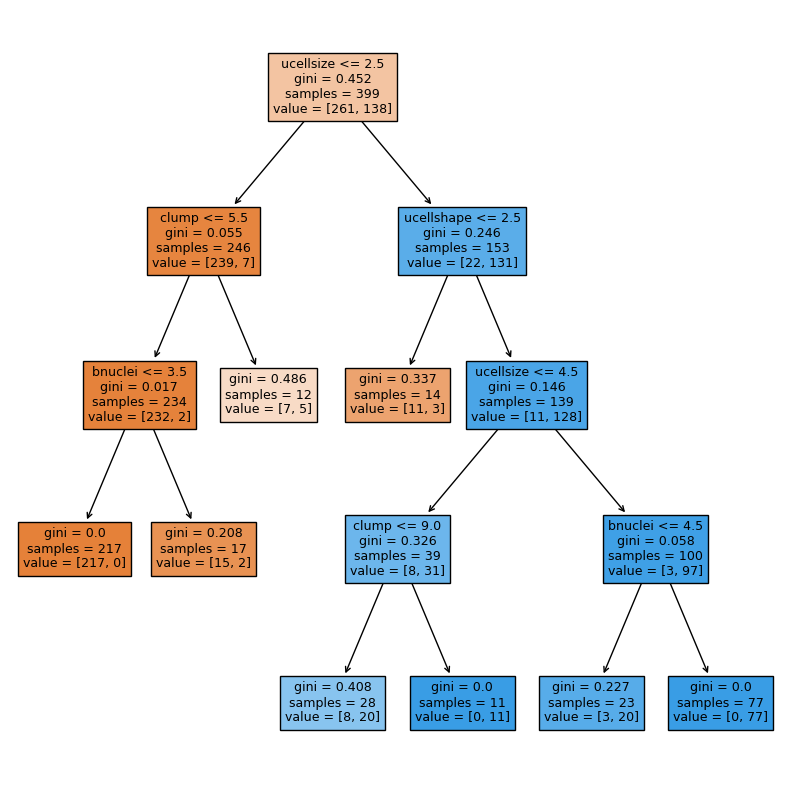

In [7]:
plt.figure (figsize=(10,10))
plot_tree(arbre,feature_names= list(data.columns[:-1]),filled=True)
plt.savefig("arbre.png")

In [8]:
tree_rules= export_text(arbre,feature_names=list(data.columns[:-1]),
show_weights=True)
print (tree_rules)

|--- ucellsize <= 2.50
|   |--- clump <= 5.50
|   |   |--- bnuclei <= 3.50
|   |   |   |--- weights: [217.00, 0.00] class: begnin
|   |   |--- bnuclei >  3.50
|   |   |   |--- weights: [15.00, 2.00] class: begnin
|   |--- clump >  5.50
|   |   |--- weights: [7.00, 5.00] class: begnin
|--- ucellsize >  2.50
|   |--- ucellshape <= 2.50
|   |   |--- weights: [11.00, 3.00] class: begnin
|   |--- ucellshape >  2.50
|   |   |--- ucellsize <= 4.50
|   |   |   |--- clump <= 9.00
|   |   |   |   |--- weights: [8.00, 20.00] class: malignant
|   |   |   |--- clump >  9.00
|   |   |   |   |--- weights: [0.00, 11.00] class: malignant
|   |   |--- ucellsize >  4.50
|   |   |   |--- bnuclei <= 4.50
|   |   |   |   |--- weights: [3.00, 20.00] class: malignant
|   |   |   |--- bnuclei >  4.50
|   |   |   |   |--- weights: [0.00, 77.00] class: malignant



In [9]:
importanceVariable={"Variable":data.columns[:-1], "Importance":
arbre.feature_importances_}
print (pd.DataFrame(importanceVariable). sort_values (by="Importance",
ascending=False))

     Variable  Importance
1   ucellsize    0.874309
2  ucellshape    0.084769
0       clump    0.033987
5     bnuclei    0.006935
3  mgadhesion    0.000000
4      sepics    0.000000
6  bchromatin    0.000000
7    normnucl    0.000000
8     mitoses    0.000000


begnin       197
malignant    103
Name: classe, dtype: int64
(array(['begnin', 'malignant'], dtype=object), array([192, 108]))
[[185  12]
 [  7  96]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

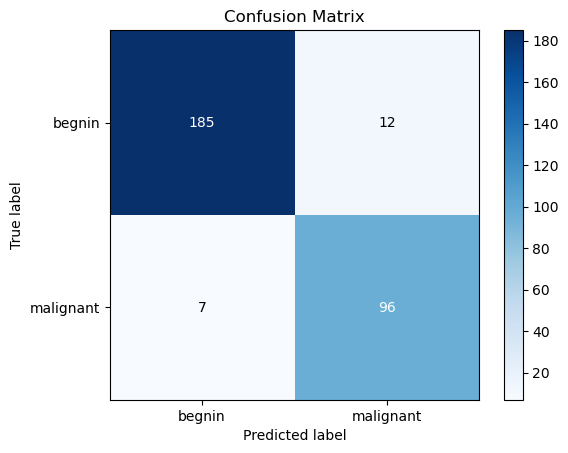

In [10]:
print (dataTest.classe.value_counts())
prediction= arbre.predict(X=dataTest.iloc[:,:-1])
print (np.unique(prediction,return_counts=True))
print (metrics.confusion_matrix(dataTest.classe, prediction))
skplt.metrics.plot_confusion_matrix(dataTest.classe, prediction,
normalize=False)

In [12]:
print (metrics.classification_report(dataTest.classe, prediction))

print ("taux de précision pour la classe malignant",
metrics.precision_score(dataTest.classe,
prediction,pos_label='malignant'))
print ("taux de rappel pour la classe malignant"
,metrics.recall_score(dataTest.classe,
prediction,pos_label='malignant'))
print ("taux de F1_mesure pour la classe malignant"
,metrics.f1_score(dataTest.classe, prediction,pos_label='malignant'))

              precision    recall  f1-score   support

      begnin       0.96      0.94      0.95       197
   malignant       0.89      0.93      0.91       103

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.94      0.94      0.94       300

taux de précision pour la classe malignant 0.8888888888888888
taux de rappel pour la classe malignant 0.9320388349514563
taux de F1_mesure pour la classe malignant 0.909952606635071


In [13]:
print ("taux de précision pour la classe begnin",
metrics.precision_score(dataTest.classe,
prediction,pos_label='begnin'))
print ("taux de rappel pour la classe begnin"
,metrics.recall_score(dataTest.classe,
prediction,pos_label='begnin'))
print ("taux de F1_mesure pour la classe begnin"
,metrics.f1_score(dataTest.classe, prediction,pos_label='begnin'))

taux de précision pour la classe begnin 0.9635416666666666
taux de rappel pour la classe begnin 0.9390862944162437
taux de F1_mesure pour la classe begnin 0.9511568123393316
